# 第1章.確率分布の理解

In [16]:
%matplotlib inline
!pip3 install japanize-matplotlib | tail -n 1
!pip3 install seaborn | tail -n 1
!pip3 install scipy | tail -n 1
!pip3 install pymc | tail -n 1
!pip3 install arviz | tail -n 1


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [5]:
# ライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from IPython.display import display
import seaborn as sns
from scipy.special import comb
import pymc as pm
import arviz as az

# Numpy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (8, 8)
# 方眼表示ON
plt.rcParams["axes.grid"] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームで全ての項目を表示
pd.set_option("display.max_columns", None)

## 離散分布

Text(0.5, 1.0, 'くじ引き問題の確率分布（5回中の当たり回数）')

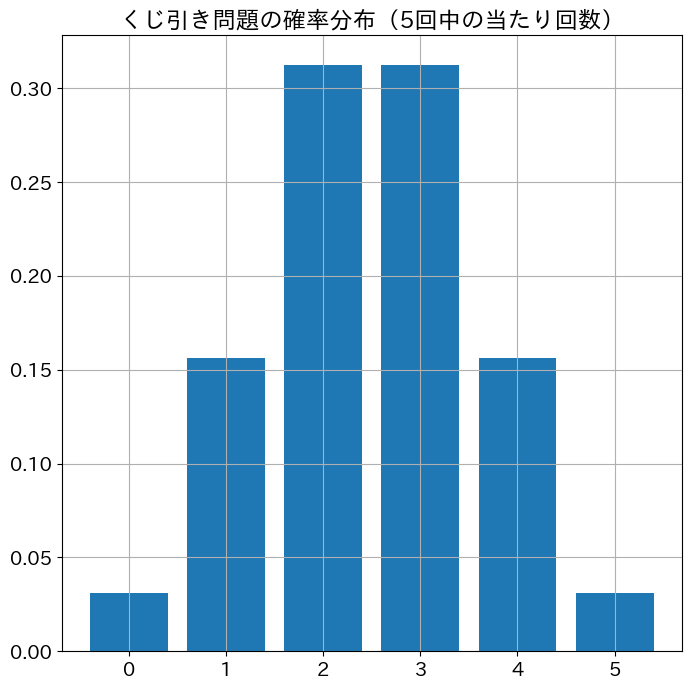

In [10]:
n = 5
x = range(n + 1)
y = [comb(n, i)/2**n for i in x]

plt.bar(x, y)
plt.title('くじ引き問題の確率分布（5回中の当たり回数）')


## 連続分布

Text(0.5, 1.0, 'くじ引き問題の確率分布（5回中の当たり回数）')

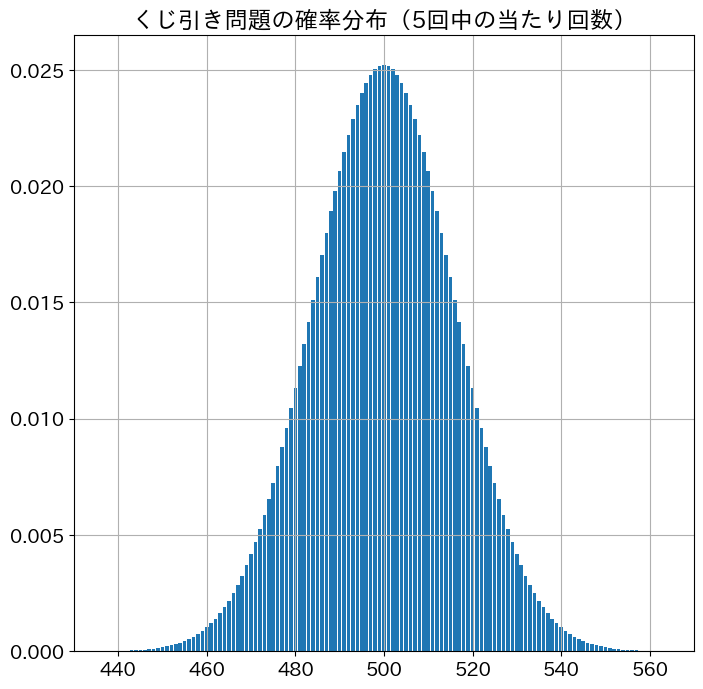

In [13]:
n = 1000
x = range(n + 1)
y = [comb(n, i)/2**n for i in x]
plt.bar(x, y)
plt.xlim(430, 570)
plt.title('くじ引き問題の確率分布（5回中の当たり回数）')

Text(0.5, 1.0, 'くじ引き問題の確率分布（5回中の当たり回数）')

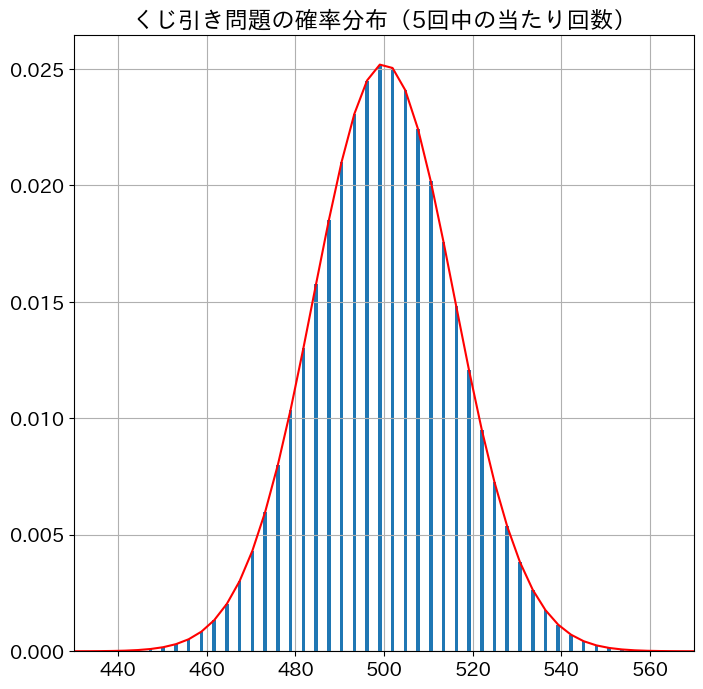

In [14]:
# 確率分布と正規分布の重ね書き
def norm(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

n = 1000
# グラフ描画
plt.xlim((430, 570))
x = np.linspace(430, 571)
# 確率分布のグラフ描画
y1 = [comb(n, i)/2**n for i in x]
plt.bar(x, y1)

# 正規分布のグラフ描画
mu = n/2
sigma = np.sqrt(mu/2)
y2 = norm(x, mu, sigma)
plt.plot(x, y2, color='red')

plt.title('くじ引き問題の確率分布（5回中の当たり回数）')

## PyMCによる確率モデル定義とサンプリング

In [17]:
print(pm.__version__)
print(az.__version__)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


5.16.2
0.19.0


In [18]:
# 確率モデルコンテキスト用のインスタンス
model = pm.Model()

# 先ほど定義したインスタンスをwith文で指定
with model:
  # Binominal 二項分布の確率分布クラス
  # p は確率、n は試行回数
  # 'x' は観測値
  x = pm.Binomial('x', n=5, p=0.5)

### 抽出結果の可視化法
#### NotebookUI

In [19]:
# サンプリング
with model:
  prior_samples = pm.sample_prior_predictive(random_seed=42)

prior_samples

Sampling: [x]


Inference data with groups:
	> prior

#### Numpy形式データを抽出

In [21]:
# 事前分布としてサンプル値を取得
x_samples = prior_samples['prior']['x'].values
print('type:', type(x_samples))
print('shape:', x_samples.shape)
print('values:', x_samples, '\n')

# 通常のNumpyデータとして頻度分析をした例
value_counts = pd.DataFrame(
  x_samples.reshape(-1)).value_counts().sort_index()
print(value_counts)

type: <class 'numpy.ndarray'>
shape: (1, 500)
values: [[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 

#### ArviZによる分析

In [22]:
summary = az.summary(prior_samples, kind = 'stats')
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.000,4.000


Text(0.5, 1.0, 'Arvizによる事前分布')

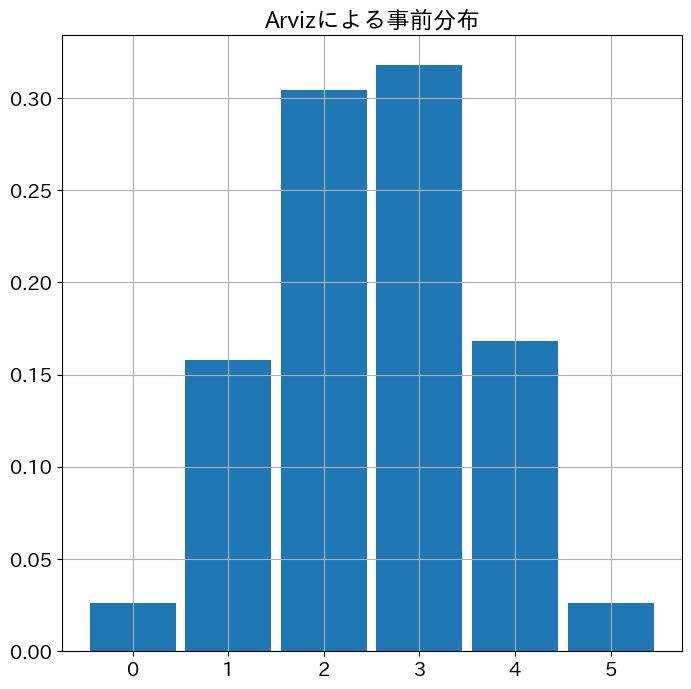

In [23]:
ax = az.plot_dist(x_samples)
ax.set_title('Arvizによる事前分布')

### 確率分布とPyMCプログラミングの関係

In [25]:
model = pm.Model()

with model:
  x = pm.Binomial('x', n=5, p=0.5)
  prior_samples = pm.sample_prior_predictive(random_seed=42)

x_samples = prior_samples['prior']['x'].values

Sampling: [x]
